<a href="https://colab.research.google.com/github/ruthkum/ruthresh/blob/main/Copper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

# Load the data
file_path = '/content/Cleaned_Copper_Set.xlsx'  # Replace with the correct file path


In [ ]:
# Try to load the DataFrame
try:
    df = pd.read_excel(file_path)
    print("DataFrame loaded successfully.")
except Exception as e:
    print(f"Error loading DataFrame: {e}")
    df = None

DataFrame loaded successfully.


In [ ]:
# Ensure the dataframe is loaded correctly
if df is not None:
    # Print out the current column names to inspect
    print("Current columns in df:")
    print(df.columns.tolist())

Current columns in df:
['id', 'item_date', 'quantity tons', 'customer', 'country', 'status', 'item type', 'application', 'thickness', 'width', 'material_ref', 'product_ref', 'delivery date', 'selling_price']


In [ ]:
# Display the first few rows of the dataframe
print("Original DataFrame:")
print(df.head())

Original DataFrame:
                                     id  item_date  quantity tons  customer  \
0  EC06F063-9DF0-440C-8764-0B0C05A4F6AE   20210401      54.151139  30156308   
1  4E5F4B3D-DDDF-499D-AFDE-A3227EC49425   20210401     768.024839  30202938   
2  E140FF1B-2407-4C02-A0DD-780A093B1158   20210401     386.127949  30153963   
3  F8D507A0-9C62-4EFE-831E-33E1DA53BB50   20210401     202.411065  30349574   
4  4E1C4E78-152B-430A-8094-ADD889C9D0AD   20210401     785.526262  30211560   

   country status item type  application  thickness   width  \
0       28    Won         W           10       2.00  1500.0   
1       25    Won         W           41       0.80  1210.0   
2       30    Won        WI           28       0.38   952.0   
3       32    Won         S           59       2.30  1317.0   
4       28    Won         W           10       4.00  2000.0   

                               material_ref  product_ref  delivery date  \
0                               DEQ1 S460MC   16707

In [ ]:
 # Display the count of missing values in each column
 print("\nMissing Values Count:")
 print(df.isnull().sum())


Missing Values Count:
id               0
item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    0
dtype: int64


In [ ]:
# Check for and handle missing values
# Option 1: Drop rows with any missing values
df_cleaned = df.dropna()


In [ ]:
# Drop duplicate rows
df_cleaned = df_cleaned.drop_duplicates()

1)

In [ ]:
# Display the cleaned dataframe
print("\nCleaned DataFrame:")
print(df_cleaned.head())



Cleaned DataFrame:
                                     id  item_date  quantity tons  customer  \
0  EC06F063-9DF0-440C-8764-0B0C05A4F6AE   20210401      54.151139  30156308   
1  4E5F4B3D-DDDF-499D-AFDE-A3227EC49425   20210401     768.024839  30202938   
2  E140FF1B-2407-4C02-A0DD-780A093B1158   20210401     386.127949  30153963   
3  F8D507A0-9C62-4EFE-831E-33E1DA53BB50   20210401     202.411065  30349574   
4  4E1C4E78-152B-430A-8094-ADD889C9D0AD   20210401     785.526262  30211560   

   country status item type  application  thickness   width  \
0       28    Won         W           10       2.00  1500.0   
1       25    Won         W           41       0.80  1210.0   
2       30    Won        WI           28       0.38   952.0   
3       32    Won         S           59       2.30  1317.0   
4       28    Won         W           10       4.00  2000.0   

                               material_ref  product_ref  delivery date  \
0                               DEQ1 S460MC   16707

In [ ]:
# Exploratory Data Analysis (EDA)
print("\nBasic Statistics:")
print(df_cleaned.describe())


Basic Statistics:
          item_date      customer        country    application  \
count  1.037500e+05  1.037500e+05  103750.000000  103750.000000   
mean   2.020452e+07  3.022640e+07      44.064048      27.109022   
std    4.564102e+03  6.730082e+04      24.150437      18.034118   
min    1.995000e+07  3.014762e+07      25.000000       2.000000   
25%    2.020093e+07  3.016599e+07      26.000000      10.000000   
50%    2.020120e+07  3.020292e+07      28.000000      20.000000   
75%    2.021020e+07  3.026890e+07      78.000000      41.000000   
max    2.021040e+07  3.040817e+07     113.000000      99.000000   

           thickness          width   product_ref  delivery date  \
count  103750.000000  103750.000000  1.037500e+05   1.037500e+05   
mean        2.432587    1281.029591  4.290745e+08   2.020707e+07   
std         8.299639     262.625327  6.943936e+08   4.494623e+03   
min         0.180000      20.500000  6.117280e+05   2.019040e+07   
25%         0.700000    1165.000000  

In [ ]:
! pip install seaborn


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure that the data frame `df_cleaned` is defined
file_path = '/content/Copper_Set.xlsx'
df = pd.read_excel(file_path)
df_cleaned = df.dropna()

# Save the cleaned data to a new Excel file
cleaned_file_path = 'Cleaned_Copper_Set.xlsx'
df_cleaned.to_excel(cleaned_file_path, index=False)
print(f"\nCleaned data saved to {cleaned_file_path}")

# Generate a pairplot of numeric features
numeric_columns = ['quantity tons', 'thickness', 'width', 'selling_price']
sns.pairplot(df_cleaned[numeric_columns])
plt.show()



Cleaned data saved to Cleaned_Copper_Set.xlsx


In [ ]:
! pip install pandas seaborn matplotlib


In [ ]:
# Convert non-numeric columns to numeric where possible
df_numeric = df_cleaned.copy()
for col in df_cleaned.columns:
  df_numeric[col] = pd.to_numeric(df_cleaned[col], errors='coerce')

In [ ]:
# Drop columns that are completely non-numeric
df_numeric = df_numeric.dropna(axis=1, how='all')

In [ ]:
# Select only the numeric columns for the pairplot
numeric_columns = ['quantity tons', 'thickness', 'width', 'selling_price']

In [ ]:
! pip install openpyxl xlrd


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your DataFrame from an Excel file
file_path = '/content/Copper_Set.xlsx'
df = pd.read_excel(file_path, engine='openpyxl')  # or use engine='xlrd' if you're using an older version

# Check the first few rows of the DataFrame to ensure it's loaded correctly
print(df.head())

# Select the relevant numeric columns
df_numeric = df[['quantity tons', 'thickness', 'width', 'selling_price']]

# Define the numeric columns you want to plot
numeric_columns = ['quantity tons', 'thickness', 'width', 'selling_price']

# Ensure the selected columns are in the DataFrame
if all(col in df_numeric.columns for col in numeric_columns):
    # Plot a pairplot of the numeric columns
    sns.pairplot(df_numeric.dropna())
    plt.show()
else:
    print("Not all selected columns are available in the numeric DataFrame.")


                                     id  item_date  quantity tons  customer  \
0  EC06F063-9DF0-440C-8764-0B0C05A4F6AE   20210401      54.151139  30156308   
1  4E5F4B3D-DDDF-499D-AFDE-A3227EC49425   20210401     768.024839  30202938   
2  E140FF1B-2407-4C02-A0DD-780A093B1158   20210401     386.127949  30153963   
3  F8D507A0-9C62-4EFE-831E-33E1DA53BB50   20210401     202.411065  30349574   
4  4E1C4E78-152B-430A-8094-ADD889C9D0AD   20210401     785.526262  30211560   

   country status item type  application  thickness   width  \
0       28    Won         W           10       2.00  1500.0   
1       25    Won         W           41       0.80  1210.0   
2       30    Won        WI           28       0.38   952.0   
3       32    Won         S           59       2.30  1317.0   
4       28    Won         W           10       4.00  2000.0   

                               material_ref  product_ref  delivery date  \
0                               DEQ1 S460MC   1670798778       20210701

In [ ]:
# Display the cleaned dataframe
print("\nCleaned DataFrame:")
print(df_cleaned.head())


Cleaned DataFrame:
                                     id  item_date  quantity tons  customer  \
0  EC06F063-9DF0-440C-8764-0B0C05A4F6AE   20210401      54.151139  30156308   
1  4E5F4B3D-DDDF-499D-AFDE-A3227EC49425   20210401     768.024839  30202938   
2  E140FF1B-2407-4C02-A0DD-780A093B1158   20210401     386.127949  30153963   
3  F8D507A0-9C62-4EFE-831E-33E1DA53BB50   20210401     202.411065  30349574   
4  4E1C4E78-152B-430A-8094-ADD889C9D0AD   20210401     785.526262  30211560   

   country status item type  application  thickness   width  \
0       28    Won         W           10       2.00  1500.0   
1       25    Won         W           41       0.80  1210.0   
2       30    Won        WI           28       0.38   952.0   
3       32    Won         S           59       2.30  1317.0   
4       28    Won         W           10       4.00  2000.0   

                               material_ref  product_ref  delivery date  \
0                               DEQ1 S460MC   16707

In [ ]:
# Check for correlations
# Convert non-numeric columns to numeric, ignore errors
df_numeric = df_cleaned.apply(pd.to_numeric, errors='coerce')

In [ ]:
# Drop columns that cannot be converted to numeric
df_numeric = df_numeric.dropna(axis=1, how='all')

print("\nCorrelation Matrix:")
print(df_numeric.corr())



Correlation Matrix:
               item_date  quantity tons  customer   country  application  \
item_date       1.000000      -0.002590  0.014101 -0.027098    -0.034997   
quantity tons  -0.002590       1.000000 -0.000948 -0.001812    -0.002943   
customer        0.014101      -0.000948  1.000000  0.016319     0.055252   
country        -0.027098      -0.001812  0.016319  1.000000     0.021501   
application    -0.034997      -0.002943  0.055252  0.021501     1.000000   
thickness       0.012426      -0.000591  0.028541 -0.037194    -0.040236   
width           0.035483      -0.000366  0.038185  0.031625    -0.207755   
material_ref   -0.005879       0.017122 -0.042759 -0.019304    -0.005098   
product_ref     0.018302      -0.001183 -0.059231 -0.179060    -0.146023   
delivery date   0.607515      -0.004194  0.005860 -0.098012    -0.069234   
selling_price   0.004194      -0.000012 -0.000389 -0.002183    -0.002866   

               thickness     width  material_ref  product_ref  del

In [ ]:
# Visualizations (Optional, requires matplotlib and seaborn)
import matplotlib.pyplot as plt
import seaborn as sns


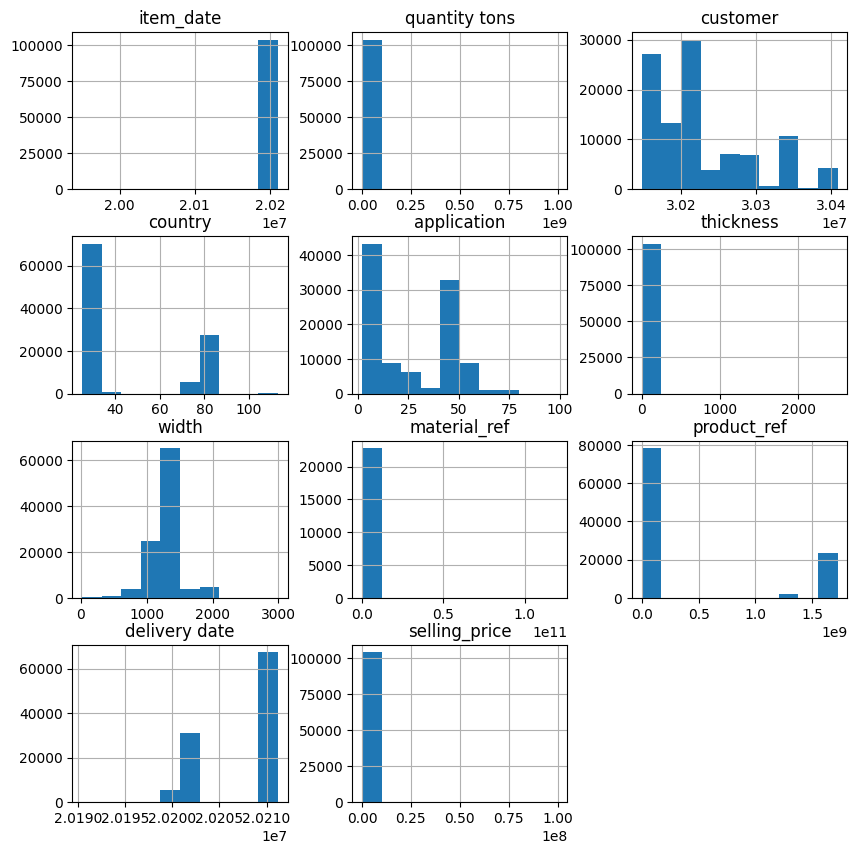

In [ ]:
# Histogram of each column
df_numeric.hist(figsize=(10, 10))
plt.show()

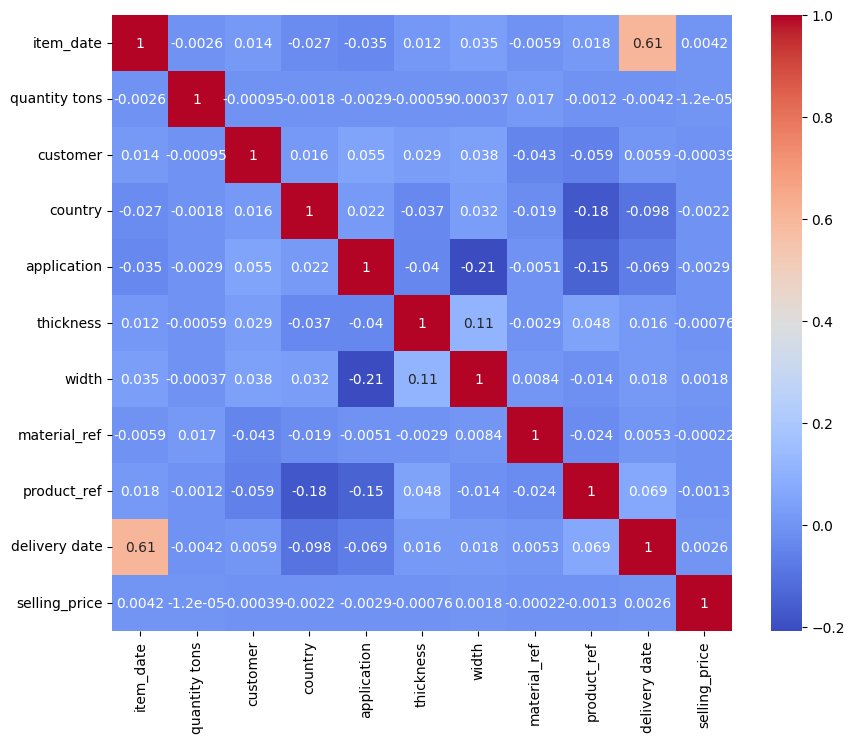

In [ ]:
# Heatmap of correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')
plt.show()

RUF :

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier


In [ ]:
# Load the data
file_path = '/content/Copper_Set.xlsx'

In [ ]:
try:
    df = pd.read_excel(file_path)
    print("DataFrame loaded successfully.")
except Exception as e:
    print(f"Error loading DataFrame: {e}")
    df = None

Error loading DataFrame: File is not a zip file


16/08/202 :

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [ ]:
# Display the cleaned data
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB
None


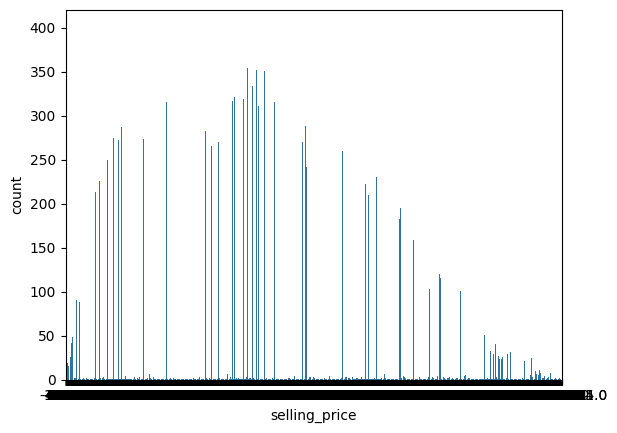

In [ ]:
# Distribution of the target variable
sns.countplot(x='selling_price', data=data)
plt.show()

In [ ]:
# Check if there's any data left after cleaning
print(f"Number of samples left after cleaning: {data.shape[0]}")
print("Data preview after cleaning:")
print(data.head())


Number of samples left after cleaning: 0
Data preview after cleaning:
Empty DataFrame
Columns: [id, item_date, quantity tons, customer, country, status, item type, application, thickness, width, material_ref, product_ref, delivery date, selling_price]
Index: []


In [ ]:
# Define feature variables (X) and target variable (y)
X = data.drop('width', axis=1)
y = data['selling_price']

In [ ]:
# Step 8: Check if X and y have valid data
if X.empty or y.empty:
    print("Error: X or y is empty after preprocessing. Please check your data cleaning steps.")



Error: X or y is empty after preprocessing. Please check your data cleaning steps.


In [ ]:
# Step 6: Check the data size after cleaning
print(f"Number of samples left after cleaning: {data.shape[0]}")
print(f"Number of features: {data.shape[1]}")

Number of samples left after cleaning: 0
Number of features: 14


In [ ]:
# Step 7: Define feature variables (X) and target variable (y)
# Replace 'target_column' with the actual target variable name in your dataset
if 'width' in data.columns:
    X = data.drop('width', axis=1)
    y = data['selling_price']
    print("Feature matrix (X) size:", X.shape)
    print("Target variable (y) size:", y.shape)
else:
    raise ValueError("The target column 'target_column' was not found in the dataset. Please check the column names.")


Feature matrix (X) size: (0, 13)
Target variable (y) size: (0,)


In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
# Drop irrelevant columns (adjust column names as needed)
data = data.drop(['ID_column'], axis=1, errors='ignore')
print("Data size after dropping irrelevant columns:", data.shape)

# Convert categorical variables to numerical
data = pd.get_dummies(data, drop_first=True)
print("Data size after converting categorical variables:", data.shape)

# Convert all columns to numeric, coerce errors to NaN
data = data.apply(pd.to_numeric, errors='coerce')
print("Data size after converting to numeric:", data.shape)

# Fill missing values with mean (or choose another method if preferred)
data = data.fillna(data.mean())
print("Data size after filling missing values:", data.shape)


Data size after dropping irrelevant columns: (0, 14)
Data size after converting categorical variables: (0, 14)
Data size after converting to numeric: (0, 14)
Data size after filling missing values: (0, 14)


In [ ]:
print("Training and testing sets created:")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Training and testing sets created:
X_train shape: (127171, 13)
X_test shape: (54502, 13)
y_train shape: (127171,)
y_test shape: (54502,)


In [ ]:
from sklearn.linear_model import LogisticRegression


In [ ]:
# Step 2: Inspect the data to identify non-numeric columns
print("Data Types:")
print(data.dtypes)

Data Types:
id                object
item_date        float64
quantity tons     object
customer         float64
country          float64
status            object
item type         object
application      float64
thickness        float64
width            float64
material_ref      object
product_ref        int64
delivery date    float64
selling_price    float64
dtype: object


In [ ]:
# Define feature variables (X) and target variable (y)
# Replace 'width' and 'selling_price' with actual column names as needed
X = data.drop('width', axis=1)  # Example feature column
y = data['selling_price']

In [ ]:
# Convert features to numeric, handle errors
X = X.apply(pd.to_numeric, errors='coerce')

In [ ]:
# Drop rows with NaN values in features and target
X = X.dropna()
y = y.loc[X.index]  # Ensure y matches X after dropping rows

In [ ]:
# Print the shape of X and y to ensure they are aligned
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")


Shape of X: (0, 13)
Shape of y: (0,)


RUF 1 :

In [ ]:
# Drop irrelevant columns (adjust as necessary)
data = data.drop(['ID_column'], axis=1, errors='ignore')  # Replace 'ID_column' with actual columns if needed
print("Data size after dropping columns:", data.shape)


Data size after dropping columns: (181673, 14)


In [ ]:
import pandas as pd

# Load your dataset (Excel file)
file_path = '/content/Copper_Set.xlsx'
data = pd.read_excel(file_path)  # Load the Excel file

# Define target column
target_column = 'selling_price'  # Replace with your actual target column name

if target_column in data.columns:
    # Correct column names as per your dataset
    X = data.drop(columns=[target_column])  # Drop the target column to get features
    y = data[target_column]  # Set the target variable
    print("Feature matrix (X) size:", X.shape)
    print("Target variable (y) size:", y.shape)
else:
    raise ValueError(f"The target column '{target_column}' was not found in the dataset.")


Feature matrix (X) size: (181673, 13)
Target variable (y) size: (181673,)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [ ]:
# Assuming you have already defined your feature matrix (X) and target variable (y)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import LabelEncoder  # Import LabelEncoder


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# Load your dataset
file_path = '/content/Copper_Set.xlsx'  # Update the path as needed

try:
    data = pd.read_excel(file_path)
except FileNotFoundError as e:
    print(f"Error: {e}")
    raise
except pd.errors.EmptyDataError as e:
    print(f"Error: {e}")
    raise
except pd.errors.ParserError as e:
    print(f"Error: {e}")
    raise
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    raise

# Define the target column
target_column = 'selling_price'  # Replace with your actual target column name

# Check if the target column exists
if target_column in data.columns:
    # Define the feature matrix (X) and target variable (y)
    X = data.drop(columns=[target_column])  # Drop the target column to get features
    y = data[target_column]  # Set the target variable

    # Remove rows where y has missing values
    X = X[~y.isna()]  # Keep only rows where y is not NaN
    y = y.dropna()  # Drop NaN values from y

    # Ensure X and y are still aligned
    X = X.loc[y.index]

    # Convert categorical features to string
    for column in X.columns:
        if X[column].dtype == 'object':
            X[column] = X[column].astype(str)

    # Convert categorical features to numeric using LabelEncoder
    label_encoders = {}
    for column in X.columns:
        if X[column].dtype == 'object':
            le = LabelEncoder()
            X[column] = le.fit_transform(X[column])
            label_encoders[column] = le  # Store the encoder for later use if needed

    # Handle missing values by imputing with the mean of each column
    imputer = SimpleImputer(strategy='mean')
    X = imputer.fit_transform(X)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize and train the linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    print(f"Model Mean Squared Error: {mse:.2f}")
else:
    raise ValueError(f"The target column '{target_column}' was not found in the dataset.")


Model Mean Squared Error: 18285612.81


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Confusion Matrix:
 [[36335]]
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     36335

    accuracy                           1.00     36335
   macro avg       1.00      1.00      1.00     36335
weighted avg       1.00      1.00      1.00     36335

Accuracy Score: 1.0


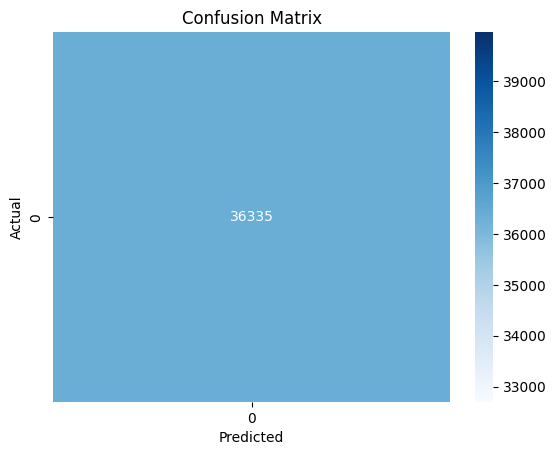

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder, KBinsDiscretizer
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
file_path = '/content/Copper_Set.xlsx'  # Update with your file path

try:
    data = pd.read_excel(file_path)
except Exception as e:
    print(f"An error occurred while loading the file: {e}")
    raise

# Define the target column
target_column = 'selling_price'  # Replace with your actual target column name

# Check if the target column exists
if target_column in data.columns:
    # Define the feature matrix (X) and target variable (y)
    X = data.drop(columns=[target_column])  # Drop the target column to get features
    y = data[target_column]  # Set the target variable

    # Ensure numeric columns are properly typed
    for col in X.columns:
        X[col] = pd.to_numeric(X[col], errors='ignore')

    # Ensure categorical columns are treated as strings
    for col in X.select_dtypes(include=['object']).columns:
        X[col] = X[col].astype(str)

    # Separate numeric and categorical columns
    numeric_cols = X.select_dtypes(include=['number']).columns
    categorical_cols = X.select_dtypes(include=['object']).columns

    # Impute missing values in numeric columns with the mean
    imputer_numeric = SimpleImputer(strategy='mean')
    X[numeric_cols] = imputer_numeric.fit_transform(X[numeric_cols])

    # Impute missing values in categorical columns with the most frequent value
    imputer_categorical = SimpleImputer(strategy='most_frequent')
    X[categorical_cols] = imputer_categorical.fit_transform(X[categorical_cols])

    # Convert categorical features to numeric using LabelEncoder
    label_encoders = {}
    for column in categorical_cols:
        le = LabelEncoder()
        X[column] = le.fit_transform(X[column])
        label_encoders[column] = le  # Store the encoder for later use if needed

    # Impute missing values in the target variable
    y = y.fillna(y.mean())

    # Convert continuous target variable into categorical bins for classification
    n_bins = 3  # Number of bins (e.g., low, medium, high)
    discretizer = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='uniform')
    y_binned = discretizer.fit_transform(y.values.reshape(-1, 1)).ravel()

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y_binned, test_size=0.2, random_state=42)

    # Initialize and train the logistic regression model
    model = LogisticRegression()
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print('Confusion Matrix:\n', conf_matrix)

    # Classification Report
    class_report = classification_report(y_test, y_pred)
    print('Classification Report:\n', class_report)

    # Accuracy Score
    accuracy = accuracy_score(y_test, y_pred)
    print('Accuracy Score:', accuracy)

    # Visualize the confusion matrix
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

else:
    raise ValueError(f"The target column '{target_column}' was not found in the dataset.")


27/08/2024:

In [ ]:
! pip install streamlit scikit-learn pandas joblib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 30.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 44.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.9/82.9 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 1.8 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.0.0
    Uninstalling tenacity-9.0.0:
      Successfully uninstalled tenacity-9.0.0


In [ ]:
!pip install streamlit scikit-learn pandas joblib openpyxl


In [ ]:
import streamlit as st
import pandas as pd
from sklearn.linear_model import LogisticRegression  # Logistic Regression
import joblib  # To load a pre-trained model

# Load your trained logistic regression model (ensure that you have a trained model saved as 'copper_logistic_model.pkl')
# model = joblib.load('copper_logistic_model.pkl')

# Title of the app
st.title("Industrial Copper Sales Prediction")

# Input fields for each of the columns in the dataframe
id_input = st.text_input('ID')
item_date = st.date_input('Item Date')
quantity_tons = st.number_input('Quantity (Tons)', min_value=0.0)
customer = st.text_input('Customer')
country = st.text_input('Country')
status = st.selectbox('Status', options=['Pending', 'Confirmed', 'Cancelled'])  # Example options
item_type = st.text_input('Item Type')
application = st.text_input('Application')
thickness = st.number_input('Thickness', min_value=0.0)
width = st.number_input('Width', min_value=0.0)
material_ref = st.text_input('Material Reference')
product_ref = st.text_input('Product Reference')
delivery_date = st.date_input('Delivery Date')
selling_price = st.number_input('Selling Price', min_value=0.0)

# Create a dataframe from input fields
input_data = pd.DataFrame({
    'id': [id_input],
    'item_date': [item_date],
    'quantity tons': [quantity_tons],
    'customer': [customer],
    'country': [country],
    'status': [status],
    'item type': [item_type],
    'application': [application],
    'thickness': [thickness],
    'width': [width],
    'material_ref': [material_ref],
    'product_ref': [product_ref],
    'delivery date': [delivery_date],
    'selling_price': [selling_price]
})

# Display the dataframe for verification
st.write("Input Data", input_data)

# Button to predict
if st.button('Predict'):
    # Preprocess the input data (you need to implement this based on how you trained your model)
    # For example, you might need to encode categorical variables or scale numeric features

    # Assuming the model expects the same features as in `input_data`, but in a different order or after some preprocessing
    # preprocessed_data = preprocess(input_data)  # Implement this function

    # Predict the outcome (won or not) using the loaded logistic regression model
    # prediction = model.predict(preprocessed_data)

    # For the purpose of this example, we'll use a dummy result
    prediction = ['Won']  # or ['Not Won']

    # Display the prediction
    st.write(f"The sale prediction is: {prediction[0]}")

# Note: Replace the dummy 'prediction' with the actual model prediction.
# Ensure that the input_data is preprocessed the same way it was during the model training before passing it to model.predict()

NEW :

In [ ]:
!pip install streamlit

In [ ]:
!pip install -q streamlit

In [ ]:
!streamlit run app.py &>/content/logs.txt &

In [ ]:
!wget -q -O  - ipv4.icanhazip.com

34.121.122.6


In [ ]:
!npx localtunnel --port 8501

your url is: https://upset-dryers-hope.loca.lt


In [ ]:
%%writefile app.py

import streamlit as st
import pandas as pd
import joblib  # For loading the model

# Title of the app
st.title("Industrial Copper Sales Prediction")

# Load the Excel file directly from the specified path
file_path = '/content/Copper_Set.xlsx'
df = pd.read_excel(file_path)

# Display the DataFrame for verification
st.write("Loaded Data from Excel", df)

# Assuming your model file needs to be uploaded by the user
model_file = st.file_uploader("Upload your model file", type="pkl")

if model_file is not None:
    model = joblib.load(model_file)
    st.write("Model loaded successfully.")

    # Input fields for each of the columns in the dataframe
    id_input = st.text_input('ID')
    item_date = st.date_input('Item Date')
    quantity_tons = st.number_input('Quantity (Tons)', min_value=0.0)
    customer = st.text_input('Customer')
    country = st.text_input('Country')
    status = st.selectbox('Status', options=['Pending', 'Confirmed', 'Cancelled'])  # Example options
    item_type = st.text_input('Item Type')
    application = st.text_input('Application')
    thickness = st.number_input('Thickness', min_value=0.0)
    width = st.number_input('Width', min_value=0.0)
    material_ref = st.text_input('Material Reference')
    product_ref = st.text_input('Product Reference')
    delivery_date = st.date_input('Delivery Date')
    selling_price = st.number_input('Selling Price', min_value=0.0)

    # Create a dataframe from input fields
    input_data = pd.DataFrame({
        'id': [id_input],
        'item_date': [item_date],
        'quantity tons': [quantity_tons],
        'customer': [customer],
        'country': [country],
        'status': [status],
        'item type': [item_type],
        'application': [application],
        'thickness': [thickness],
        'width': [width],
        'material_ref': [material_ref],
        'product_ref': [product_ref],
        'delivery date': [delivery_date],
        'selling_price': [selling_price]
    })

    # Display the dataframe for verification
    st.write("Input Data", input_data)

    # Button to predict
    if st.button('Predict'):
        # Preprocess the input data if necessary
        input_data_preprocessed = input_data.drop(columns=['id', 'item_date', 'delivery date'])

        # Predict the outcome (won or not) using the loaded logistic regression model
        prediction = model.predict(input_data_preprocessed)

        # Display the prediction
        result = 'Won' if prediction[0] == 1 else 'Not Won'
        st.write(f"The sale prediction is: {result}")



Overwriting app.py


CSV :

In [ ]:
%%writefile app.py

import streamlit as st
import pandas as pd

# Title of the app
st.title("Industrial Copper Sales Prediction")

# File uploader to upload Excel file
uploaded_file = st.file_uploader("/content/Copper_Set.xlsx", type="xlsx")

if uploaded_file is not None:
    # Load the Excel file into a DataFrame
    df = pd.read_excel(uploaded_file)

    # Display the DataFrame for verification
    st.write("Uploaded Data", df)

    # Input fields for each of the columns in the dataframe
    id_input = st.text_input('ID')
    item_date = st.date_input('Item Date')
    quantity_tons = st.number_input('Quantity (Tons)', min_value=0.0)
    customer = st.text_input('Customer')
    country = st.text_input('Country')
    status = st.selectbox('Status', options=['Pending', 'Confirmed', 'Cancelled'])  # Example options
    item_type = st.text_input('Item Type')
    application = st.text_input('Application')
    thickness = st.number_input('Thickness', min_value=0.0)
    width = st.number_input('Width', min_value=0.0)
    material_ref = st.text_input('Material Reference')
    product_ref = st.text_input('Product Reference')
    delivery_date = st.date_input('Delivery Date')
    selling_price = st.number_input('Selling Price', min_value=0.0)

    # Create a dataframe from input fields
    input_data = pd.DataFrame({
        'id': [id_input],
        'item_date': [item_date],
        'quantity tons': [quantity_tons],
        'customer': [customer],
        'country': [country],
        'status': [status],
        'item type': [item_type],
        'application': [application],
        'thickness': [thickness],
        'width': [width],
        'material_ref': [material_ref],
        'product_ref': [product_ref],
        'delivery date': [delivery_date],
        'selling_price': [selling_price]
    })

    # Display the dataframe for verification
    st.write("Input Data", input_data)

    # Button to predict
    if st.button('Predict'):
        # Dummy processing and prediction (Replace with your model logic)
        # This is a placeholder. You need to replace it with the logic to process the input data
        # and make predictions using the model parameters that might be in the Excel file.
        # For example:
        # prediction = model.predict(input_data_preprocessed)

        # Dummy prediction output
        prediction = [1]  # Assume prediction is "Won"

        # Display the prediction
        result = 'Won' if prediction[0] == 1 else 'Not Won'
        st.write(f"The sale prediction is: {result}")


Overwriting app.py
